<a href="https://colab.research.google.com/github/mweber1151/DS_Sandbox/blob/master/Weber_Mike_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip



In [0]:
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import matplotlib.mlab as mlab
import seaborn as sns  # pretty plotting, including heat map

In [0]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [89]:
# load file
valid_survey_input = pd.read_csv('/content/drive/My Drive/MSDS422/mspa-survey-data.csv')
valid_survey_input.columns

Index(['RespondentID', 'Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')

In [0]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [91]:
# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')


Contents of initial survey data ---------------


In [92]:
# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 


Number of Respondents = 207


In [93]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [94]:
# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

              Personal_JavaScalaSpark  ...  Graduate_Date
RespondentID                           ...               
5135740122                          0  ...            NaN
5133300037                         10  ...    Spring 2018
5132253300                         20  ...      Fall 2018
5132096630                         10  ...      Fall 2017
5131990362                         20  ...      Fall 2018

[5 rows x 40 columns]


In [0]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [38]:
#validate that each response has full allocation of 100 points (personal preference)
survey_df['My_Total'] = np.sum(survey_df[['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS']], axis = 1)
survey_df['My_Total'].value_counts()

100    207
Name: My_Total, dtype: int64

In [39]:
#validate that each response has full allocation of 100 points (professional preference)
survey_df['Prof_Total'] = np.sum(survey_df[['Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS']], axis = 1)
survey_df['Prof_Total'].value_counts()

100    207
Name: Prof_Total, dtype: int64

In [40]:
#validate that each response has full allocation of 100 points (industry preference)
survey_df['Ind_Total'] = np.sum(survey_df[['Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS']], axis = 1)
survey_df['Ind_Total'].value_counts()

100    207
Name: Ind_Total, dtype: int64

In [98]:
survey_df['Courses_Completed'].value_counts()

2.0     25
5.0     24
7.0     24
10.0    20
6.0     16
9.0     14
3.0     13
4.0     13
8.0     11
11.0    11
12.0    10
1.0      6
Name: Courses_Completed, dtype: int64

In [0]:
courses = ['PREDICT400', 'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 
           'PREDICT420', 'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 
           'PREDICT453', 'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 
           'OtherPython', 'OtherR', 'OtherSAS']
s_course = {'PREDICT400' : '400', 'PREDICT401' : '401', 'PREDICT410' : '410',
            'PREDICT411' : '411', 'PREDICT413' : '413', 'PREDICT420' : '420', 
            'PREDICT422' : '422', 'PREDICT450' : '450', 'PREDICT451' : '451', 
            'PREDICT452' : '452', 'PREDICT453' : '453', 'PREDICT454' : '454', 
            'PREDICT455' : '455', 'PREDICT456' : '456', 'PREDICT457' : '457', 
            'OtherPython' : 'othP', 'OtherR' : 'othR', 'OtherSAS' : 'othSAS'}
short_c = ['400', '401', '410', '411',  '413', '420', '422', '450', '451', 
           '452', '453', '454', '455', '456', '457', 'othP', 'othR', 'othSAS']
p = ['400', '420', '452', '453', 'othP']
r = ['401', '413', '422', '450', '451', '454', '455', '456', '457', 'othR']
s = ['410', '411', 'othSAS']


In [100]:
for i in short_c:
  survey_df[i] = np.zeros(len(survey_df))
survey_df.columns

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest', 'Courses_Completed', 'PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other', 'Graduate_Date', '400', '401', '410',
       '411', '413', '420', '422', '450', '451', '452', '453', '454', '455',
       '456', '457', 'othP', 'othR', 'othSAS'],
      dtype='object')

In [101]:
s_course['PREDICT400']

'400'

In [102]:
str(survey_df['PREDICT400'][0]) == 'nan'

True

In [103]:
for i in range(len(survey_df)):
  for c in courses:
    if str(survey_df[c][i]) == 'nan':
      survey_df[s_course[c]][i] = 0
    else:
      survey_df[s_course[c]][i] = 1  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
survey_df[['PREDICT422', '422', 'PREDICT456', '456']]

,PREDICT422,422,PREDICT456,456
RespondentID,,,,
5135740122,NaN,0.0,NaN,0.0
5133300037,NaN,0.0,NaN,0.0
5132253300,NaN,0.0,NaN,0.0
5132096630,NaN,0.0,NaN,0.0
5131990362,NaN,0.0,NaN,0.0
...,...,...,...,...
5109972944,NaN,0.0,NaN,0.0
5109962530,NaN,0.0,NaN,0.0
5109927686,NaN,0.0,NaN,0.0


In [105]:
#identify responses who have take a course in each language
survey_df['Python_Completed'] = np.sum(survey_df[p], axis = 1)
survey_df['Python_Completed'].value_counts()

2.0    98
1.0    80
0.0    15
3.0    13
4.0     1
Name: Python_Completed, dtype: int64

In [106]:
#identify responses who have take a course in each language
survey_df['R_Completed'] = np.sum(survey_df[r], axis = 1)
survey_df['R_Completed'].value_counts()

1.0    84
2.0    36
3.0    33
0.0    29
4.0    19
5.0     6
Name: R_Completed, dtype: int64

In [107]:
#identify responses who have take a course in each language
survey_df['SAS_Completed'] = np.sum(survey_df[s], axis = 1)
survey_df['SAS_Completed'].value_counts()

2.0    110
0.0     61
1.0     34
3.0      2
Name: SAS_Completed, dtype: int64

In [108]:
for i in range(len(survey_df)):
  for x in p:
    if survey_df[x][i] == 1:
      survey_df['Python_Completed'][i] = 1    
survey_df['Python_Completed'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1.0    192
0.0     15
Name: Python_Completed, dtype: int64

In [109]:
for i in range(len(survey_df)):
  for x in r:
    if survey_df[x][i] == 1:
      survey_df['R_Completed'][i] = 1    
survey_df['R_Completed'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1.0    178
0.0     29
Name: R_Completed, dtype: int64

In [110]:
for i in range(len(survey_df)):
  for x in s:
    if survey_df[x][i] == 1:
      survey_df['SAS_Completed'][i] = 1    
survey_df['SAS_Completed'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1.0    146
0.0     61
Name: SAS_Completed, dtype: int64

In [0]:
my_cols = ['Python_Completed', 'R_Completed', 'SAS_Completed', 'My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS' ]
prof_cols = ['Courses_Completed', 'Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS']
ind_cols = ['Courses_Completed', 'Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS']

In [112]:
py_chart = survey_df[['Python_Completed', 'R_Completed', 'SAS_Completed', 'My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS']]
py_chart

,Python_Completed,R_Completed,SAS_Completed,My_Java,My_JS,My_Python,My_R,My_SAS
RespondentID,,,,,,,,
5135740122,0.0,0.0,0.0,0,0,0,50,50
5133300037,1.0,1.0,1.0,10,10,50,30,0
5132253300,1.0,1.0,0.0,20,0,40,40,0
5132096630,1.0,1.0,1.0,10,10,25,35,20
5131990362,0.0,1.0,1.0,20,0,0,70,10
...,...,...,...,...,...,...,...,...
5109972944,0.0,1.0,1.0,0,0,0,50,50
5109962530,1.0,1.0,1.0,10,10,33,33,14
5109927686,1.0,0.0,0.0,0,0,40,40,20


In [113]:
my_survey = survey_df[my_cols]
my_survey

,Python_Completed,R_Completed,SAS_Completed,My_Java,My_JS,My_Python,My_R,My_SAS
RespondentID,,,,,,,,
5135740122,0.0,0.0,0.0,0,0,0,50,50
5133300037,1.0,1.0,1.0,10,10,50,30,0
5132253300,1.0,1.0,0.0,20,0,40,40,0
5132096630,1.0,1.0,1.0,10,10,25,35,20
5131990362,0.0,1.0,1.0,20,0,0,70,10
...,...,...,...,...,...,...,...,...
5109972944,0.0,1.0,1.0,0,0,0,50,50
5109962530,1.0,1.0,1.0,10,10,33,33,14
5109927686,1.0,0.0,0.0,0,0,40,40,20


In [0]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  if sys.path[0] == '':


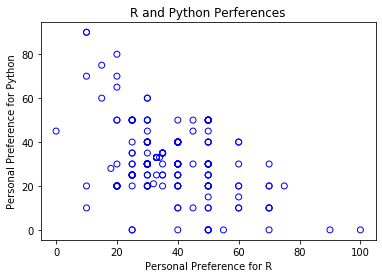

In [116]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

In [0]:
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/usr/local

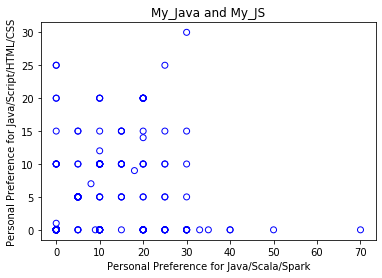

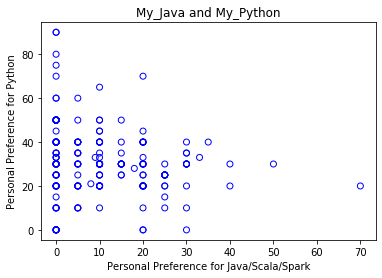

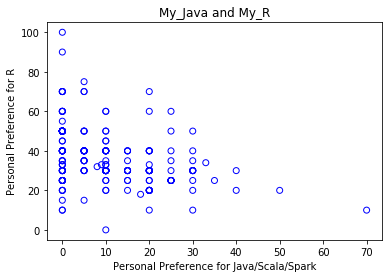

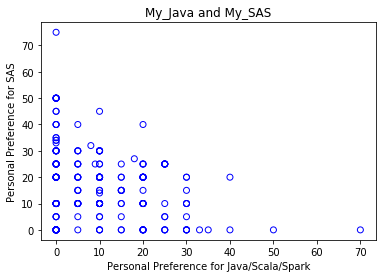

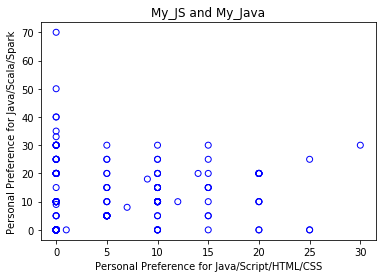

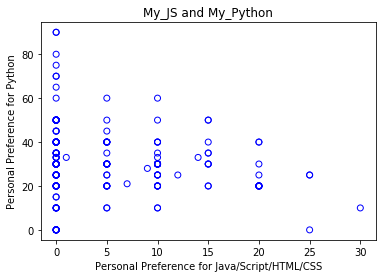

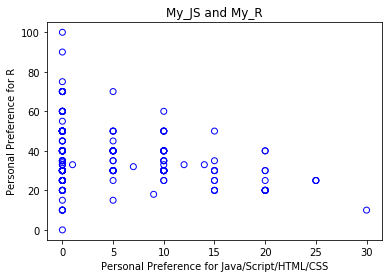

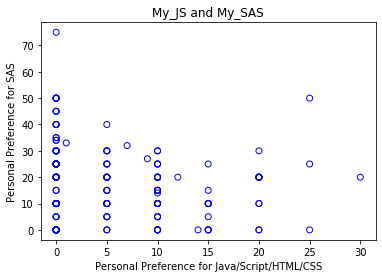

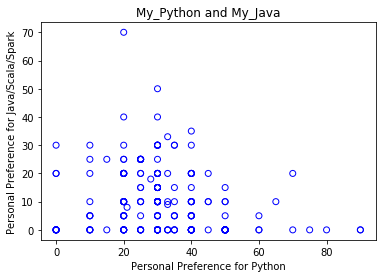

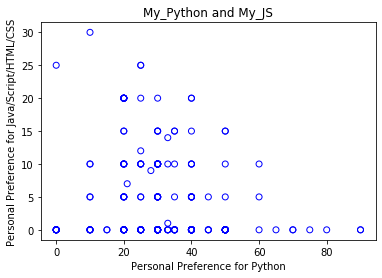

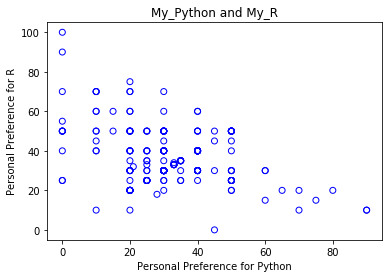

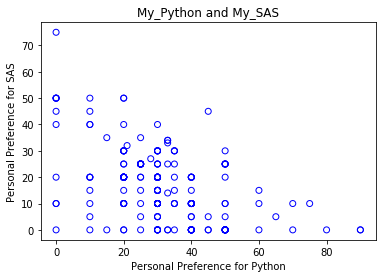

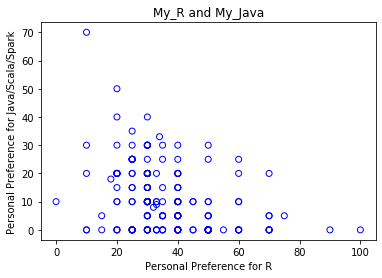

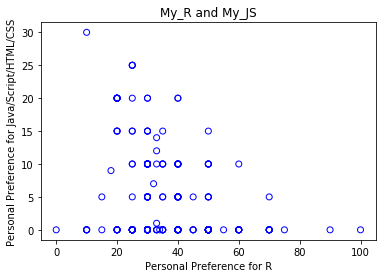

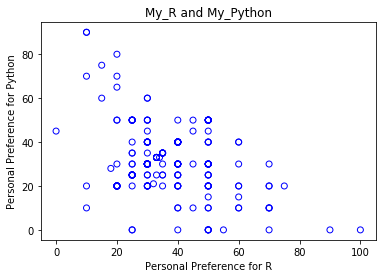

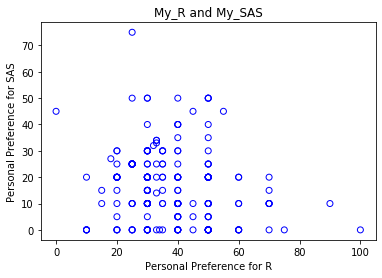

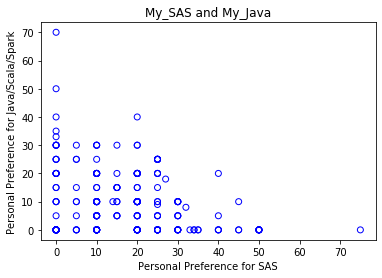

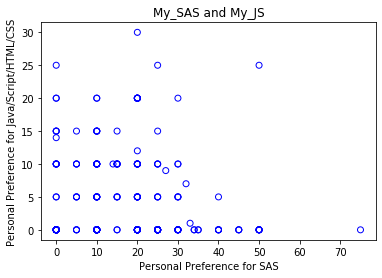

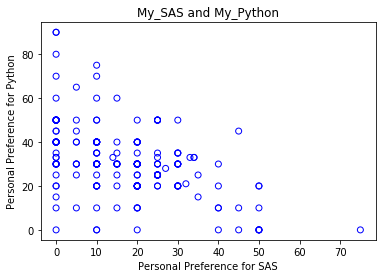

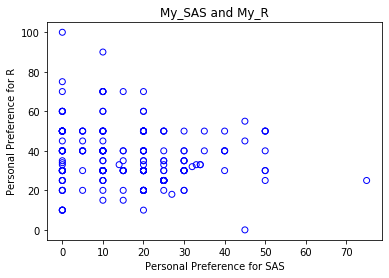

In [118]:
# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

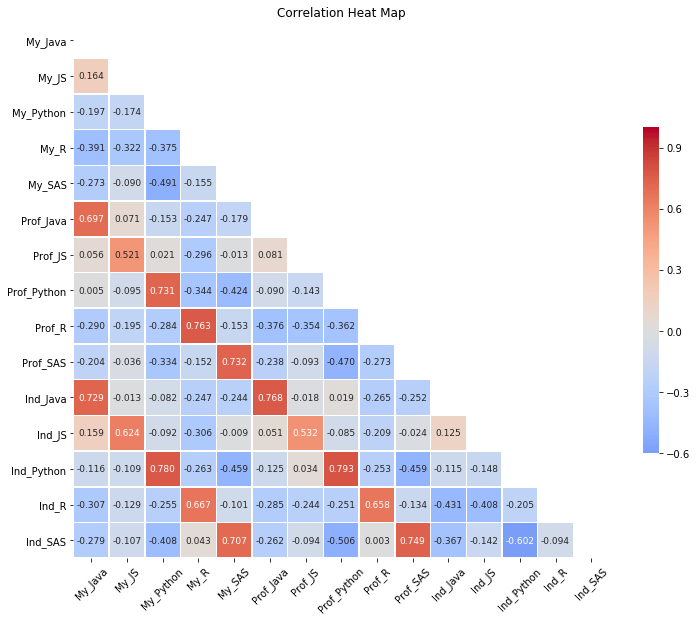

In [164]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

In [120]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python  ...  Ind_Python       Ind_R     Ind_SAS
count  207.000000  207.000000  207.000000  ...  207.000000  207.000000  207.000000
mean    10.135266    4.797101   31.304348  ...   29.772947   32.434783   18.884058
std     11.383477    6.757764   15.570982  ...   17.959816   15.912209   19.137623
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000000    0.000000   20.000000  ...   20.000000   22.500000    0.000000
50%      9.000000    0.000000   30.000000  ...   30.000000   30.000000   15.000000
75%     20.000000   10.000000   40.000000  ...   40.000000   40.000000   30.000000
max     70.000000   30.000000   90.000000  ...   95.000000   85.000000  100.000000

[8 rows x 15 columns]


In [121]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [0]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()
X = X.values.reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  import sys


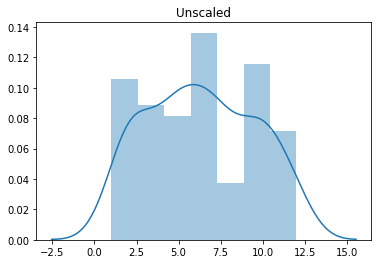

In [124]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


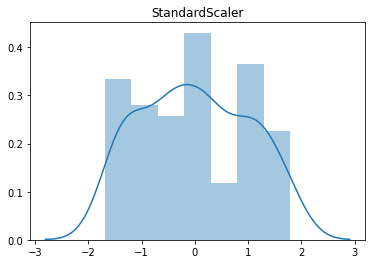

In [125]:
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


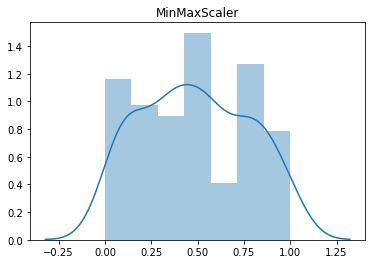

In [126]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


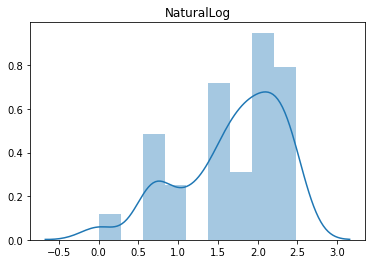

In [127]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [131]:
survey_df.columns

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest', 'Courses_Completed', 'PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other', 'Graduate_Date', '400', '401', '410',
       '411', '413', '420', '422', '450', '451', '452', '453', '454', '455',
       '456', '457', 'othP', 'othR', 'othSAS', 'Python_Completed',
       'R_Completed', 'SAS_Completed'],
      dtype='object')

In [0]:
df = survey_df[['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
               'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 
               'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS', 'Courses_Completed']]


In [0]:
my = df[['Courses_Completed', 'My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS']]
prof = df[['Courses_Completed', 'Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 
          'Prof_SAS']]
ind = df[['Courses_Completed', 'Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 
         'Ind_SAS']]

In [0]:
df2 = df[df['Courses_Completed'] <= 6]

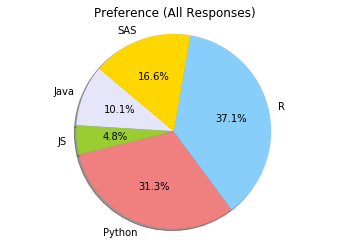

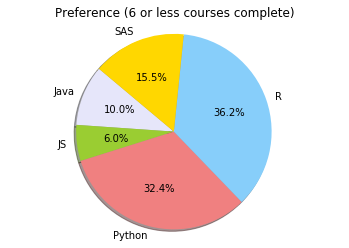

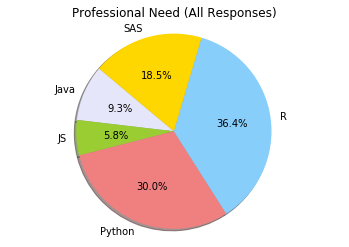

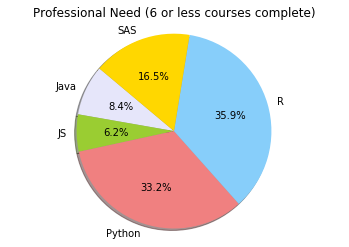

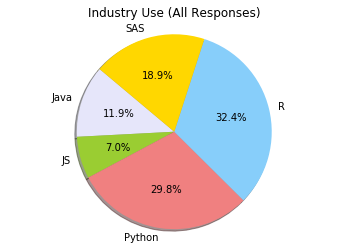

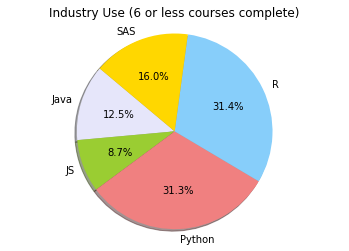

In [163]:
f1 = plt.figure(1)
# Data to plot
labels = 'Java', 'JS', 'Python', 'R', 'SAS'
sizes = [np.sum(df['My_Java']), np.sum(df['My_JS']), np.sum(df['My_Python']), 
         np.sum(df['My_R']), np.sum(df['My_SAS'])]
colors = ['lavender', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Preference (All Responses)')
plt.axis('equal')

f2 = plt.figure(2)
# Data to plot
labels = 'Java', 'JS', 'Python', 'R', 'SAS'
sizes = [np.sum(df2['My_Java']), np.sum(df2['My_JS']), np.sum(df2['My_Python']), 
         np.sum(df2['My_R']), np.sum(df2['My_SAS'])]
colors = ['lavender', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Preference (6 or less courses complete)')
plt.axis('equal')

f3 = plt.figure(3)
# Data to plot
labels = 'Java', 'JS', 'Python', 'R', 'SAS'
sizes = [np.sum(df['Prof_Java']), np.sum(df['Prof_JS']), np.sum(df['Prof_Python']), 
         np.sum(df['Prof_R']), np.sum(df['Prof_SAS'])]
colors = ['lavender', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Professional Need (All Responses)')
plt.axis('equal')

f4 = plt.figure(4)
# Data to plot
labels = 'Java', 'JS', 'Python', 'R', 'SAS'
sizes = [np.sum(df2['Prof_Java']), np.sum(df2['Prof_JS']), np.sum(df2['Prof_Python']), 
         np.sum(df2['Prof_R']), np.sum(df2['Prof_SAS'])]
colors = ['lavender', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Professional Need (6 or less courses complete)')
plt.axis('equal')


f5 = plt.figure(5)
# Data to plot
labels = 'Java', 'JS', 'Python', 'R', 'SAS'
sizes = [np.sum(df['Ind_Java']), np.sum(df['Ind_JS']), np.sum(df['Ind_Python']), 
         np.sum(df['Ind_R']), np.sum(df['Ind_SAS'])]
colors = ['lavender', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Industry Use (All Responses)')
plt.axis('equal')

f5 = plt.figure(6)
# Data to plot
labels = 'Java', 'JS', 'Python', 'R', 'SAS'
sizes = [np.sum(df2['Ind_Java']), np.sum(df2['Ind_JS']), np.sum(df2['Ind_Python']), 
         np.sum(df2['Ind_R']), np.sum(df2['Ind_SAS'])]
colors = ['lavender', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Industry Use (6 or less courses complete)')
plt.axis('equal')

plt.show()

In [168]:
noSAS = survey_df
noSAS['SAS'] = noSAS['My_SAS'] + noSAS['Prof_SAS'] + noSAS['Ind_SAS']
len(noSAS[noSAS['SAS'] == 0])

32

In [170]:
noPy = survey_df
noPy['Py'] = noPy['My_Python'] + noPy['Prof_Python'] + noSAS['Ind_Python']
len(noPy[noPy['Py'] == 0])

9

In [171]:
noR = survey_df
noR['R'] = noR['My_R'] + noR['Prof_R'] + noR['Ind_R']
len(noR[noR['R'] == 0])

1

In [172]:
survey_df.columns

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest', 'Courses_Completed', 'PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other', 'Graduate_Date', '400', '401', '410',
       '411', '413', '420', '422', '450', '451', '452', '453', '454', '455',
       '456', '457', 'othP', 'othR', 'othSAS', 'Python_Completed',
       'R_Completed', 'SAS_Completed', 'SAS', 'Py', 'R'],
      dtype='object')

In [0]:
survey_df2 = survey_df[survey_df['Courses_Completed'] <= 8]
DE = survey_df[['Python_Course_Interest', 'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest', 
                'Systems_Analysis_Course_Interest']]

In [235]:
m = 60

DE['PY'] = 0
DE['F_DE'] = 0
DE['AA'] = 0
DE['SA'] = 0
for i in range(len(DE)):
  if DE['Python_Course_Interest'][i] >= m:
    DE['PY'][i] = 1
  if DE['Foundations_DE_Course_Interest'][i] >= m:
    DE['F_DE'][i] = 1
  if DE['Analytics_App_Course_Interest'][i] >= m:
    DE['AA'][i] = 1
  if DE['Systems_Analysis_Course_Interest'][i] >= m:
    DE['SA'][i] = 1
DE['All'] = DE['PY'] + DE['F_DE'] + DE['AA'] + DE['SA']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [236]:
DE['All'].value_counts()

2    51
1    49
4    48
3    37
0    22
Name: All, dtype: int64

In [233]:
DE['All'].value_counts()

2    31
1    31
4    28
3    28
0    14
Name: All, dtype: int64

In [230]:
DE['All'].value_counts()

4    24
2    24
1    22
3    19
0     8
Name: All, dtype: int64

In [174]:
survey_df['Python_Course_Interest'].describe()

count    206.000000
mean      73.529126
std       29.835429
min        0.000000
25%       53.000000
50%       82.500000
75%      100.000000
max      100.000000
Name: Python_Course_Interest, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


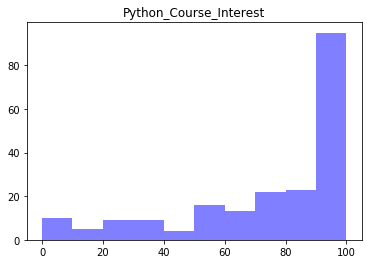

In [193]:
x = survey_df['Python_Course_Interest']
num_bins = 10
n, bins, atches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Python Course Interest')
plt.show()

In [178]:
survey_df['Foundations_DE_Course_Interest'].describe()

count    200.000000
mean      58.045000
std       32.588079
min        0.000000
25%       29.500000
50%       60.000000
75%       89.250000
max      100.000000
Name: Foundations_DE_Course_Interest, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


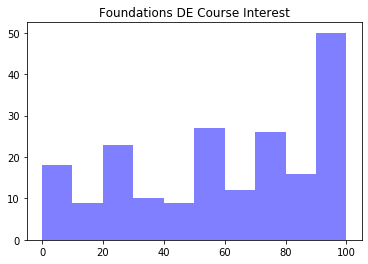

In [194]:
x = survey_df['Foundations_DE_Course_Interest']
num_bins = 10
n, bins, atches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Foundations DE Course Interest')
plt.show()

In [189]:
survey_df['Analytics_App_Course_Interest'].describe()

count    203.000000
mean      55.201970
std       34.147954
min        0.000000
25%       25.000000
50%       60.000000
75%       85.000000
max      100.000000
Name: Analytics_App_Course_Interest, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


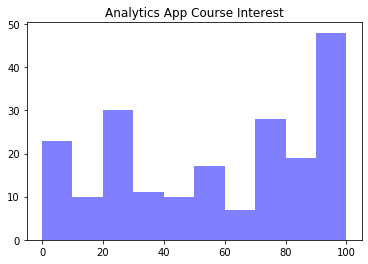

In [195]:
x = survey_df['Analytics_App_Course_Interest']
num_bins = 10
n, bins, atches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Analytics App Course Interest')
plt.show()

In [191]:
survey_df['Systems_Analysis_Course_Interest'].describe()

count    200.000000
mean      53.630000
std       33.539493
min        0.000000
25%       21.500000
50%       51.500000
75%       80.250000
max      100.000000
Name: Systems_Analysis_Course_Interest, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


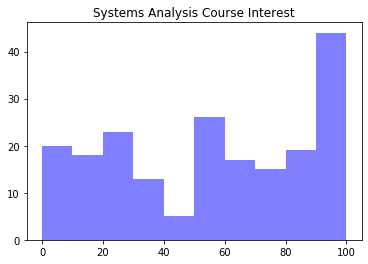

In [196]:
x = survey_df['Systems_Analysis_Course_Interest']
num_bins = 10
n, bins, atches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('  Interest')
plt.show()